<a href="https://colab.research.google.com/github/marybello/C-neural-network/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0 , test_images/255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']
               

170500096/170498071 [==============================] - 4s 0us/step


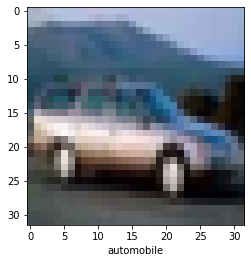

In [ ]:
img_index = 4
plt.imshow(train_images[img_index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]])
plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Convolution2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Convolution2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Convolution2D(64, (3,3), activation='relu'))


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [34]:
#training your dataset
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(train_images, train_labels, epochs=4, validation_data=(test_images,test_labels))

Epoch 1/4
1563/1563 [==============================] - 65s 42ms/step - loss: 1.5654 - accuracy: 0.4262 - val_loss: 1.2879 - val_accuracy: 0.5322
Epoch 2/4
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1988 - accuracy: 0.5738 - val_loss: 1.1584 - val_accuracy: 0.5870
Epoch 3/4
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0348 - accuracy: 0.6356 - val_loss: 1.1060 - val_accuracy: 0.6073
Epoch 4/4
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9397 - accuracy: 0.6678 - val_loss: 0.9695 - val_accuracy: 0.6577


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.9695 - accuracy: 0.6577
0.6577000021934509


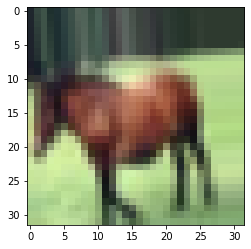

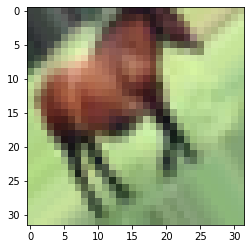

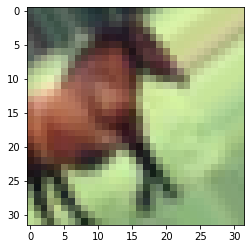

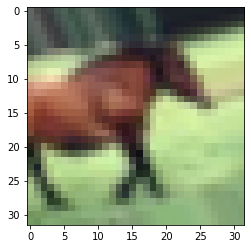

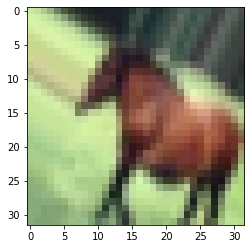

In [36]:
#working with smaller datasets and augumenting the datasets you have
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
dataGen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode= 'nearest'
)
test_img = train_images[7]
img = image.img_to_array(test_img)
img = img.reshape((1,)+ img.shape)
i=0
for batch in dataGen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot=plt.imshow(image.img_to_array(batch[0]))
  i+=1
  if i > 4: #show 4 images
    break
plt.show()    

In [37]:
#using a images from google
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras  = tf.keras



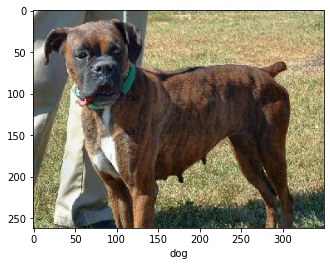

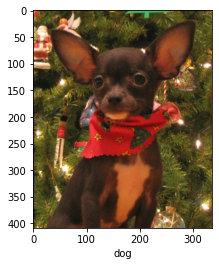

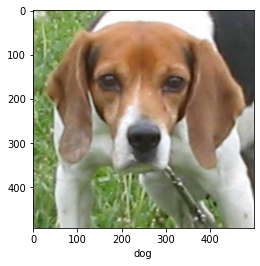

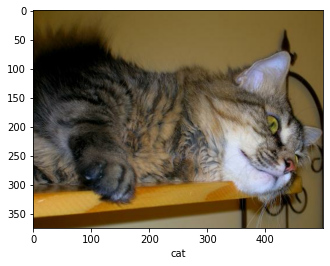

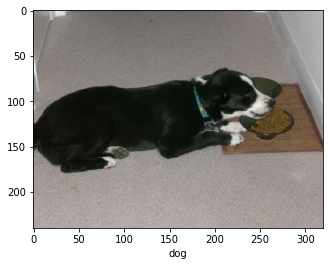

In [38]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)
get_label_name = metadata.features['label'].int2str
for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.xlabel(get_label_name(label))
  plt.show()

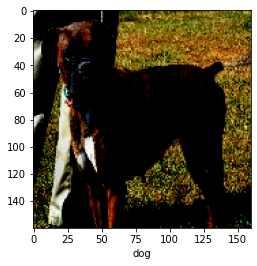

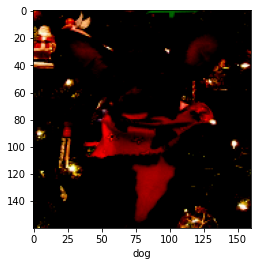

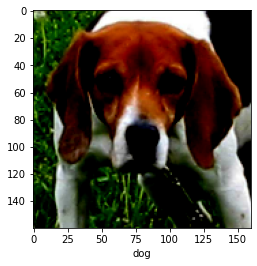

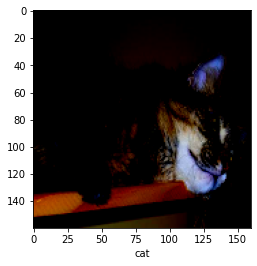

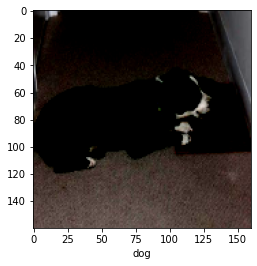

In [39]:
img_size =160
def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image,(img_size, img_size))
  return image, label
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.xlabel(get_label_name(label))
  plt.show()

In [40]:
#using a pretrained model
image_shape =(img_size, img_size ,3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape= image_shape,
    include_top=False,
    weights='imagenet'
)

In [41]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [42]:
base_model.trainable=False

In [43]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [44]:
prediction_layer = keras.layers.Dense(1)

In [45]:
model = tf.keras.Sequential([
                             base_model,
                             global_average_layer,
                             prediction_layer
])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [49]:
base_learning_rate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(base_learning_rate),
    loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics =['accuracy']
     
)
loss0, accuracy0 = model.evaluate(validation_batches,steps=20)


NameError: ignored

NameError: ignored

In [ ]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data= validation_batches)
acc = history.history['accuracy']

In [ ]:
#saving model
#model.save('name.h5')
new_model = tf.keras.models.load_model('name.h5') #loading it for use